In [1]:
import findspark
findspark.init()

import pyspark
import random

from pyspark import SparkContext
from pyspark.sql import SQLContext

sc = pyspark.SparkContext(appName="Pi")

#sc = SparkContext()
sqlContext = SQLContext(sc)

In [2]:

df = sqlContext.read.parquet("/home/jovyan/work/notebook/flat/000000_1")

In [6]:
import numpy as np
import pandas as pd

#df.printSchema()
#df.select('date','schemaid','__name__','value').dropDuplicates().head(5)
#pf=df.filter(df["value"]>'0').filter(df["__name__"]=='bis_adapter_active_processes').select('schemaid','instance','adapter','value').limit(20000000).toPandas()
#pf=df.filter(df["value"]>'0').filter(df["__name__"]=='bis_adapter_active_processes').select("*").limit(2000).toPandas()

#pf=df.filter(df["value"]>'0').filter(df["hashvalue"]==-1337192471).select('date','value').limit(200000).toPandas()
#pf=df.filter(df["value"]>'0').filter(df["hashvalue"]==-1337192471).select('date','value').limit(200000).toPandas()


#df.filter(df["__name__"]=='bis_jms_delivering_count').select('schemaid','__name__','value').limit(2000).toPandas()

# Profiling

In [ ]:
import os
os.environ['http_proxy'] = "http://172.30.12.56:3128" 
os.environ['https_proxy'] = "https://172.30.12.56:3128"  
!conda install -y -c conda-forge pandas-profiling

In [83]:
import pandas_profiling
import numpy as np
#pf.describe()
pandas_profiling.ProfileReport(pf)
#pandas_profiling.ProfileReport(meta_p)
#pf

# Hive

In [3]:
import os
os.environ['http_proxy'] = "http://172.30.12.56:3128" 
os.environ['https_proxy'] = "https://172.30.12.56:3128"  
!conda install -y pyhive

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.7.12
  latest version: 4.8.0

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.



In [4]:
from sqlalchemy import create_engine
from pyhive import hive

from sqlalchemy import *
from sqlalchemy.engine import create_engine
from sqlalchemy.schema import *

#engine = create_engine('hive://clspromon-aio01:10000/default')
engine = create_engine('hive://172.30.17.145:10000/default')

In [5]:
inspector = inspect(engine)

# Get table information
#print(inspector.get_table_names())

# Get column information
row=inspector.get_columns('tables_stage1_p_meta_complete')

col = [] 
for _row in row:
    #print(_row['name'])
    col.append(_row['name'])

#col

import pandas as pd
#row =  engine.execute("describe table `default`.`tables_stage1`")
#row =  engine.execute("select * from tables_stage1_p")
row =  engine.execute("select * from  tables_stage1_p_meta_complete")
meta_p = pd.DataFrame(row)
#df.columns = ['a', 'b','c', 'd','e', 'f','g', 'h', 'i']
meta_p.columns = col
#pyspark.createDataFrame(meta_p).collect()  


product
service
__name__
alertname
alertstate
instance
job
severity
code
le
quantile
scrape_job
interval
event
role
name
config
call
endpoint
rule_group
handler
slice
branch
goversion
revision
version
listener_name
dialer_name
reason
area
runtime
vendor
gc
pool
cache
adapterid
adapter
type
enginetype
status
remotegroupid
remoteinstanceid
remotesystemid
queue
env
state
logical_system
prio
port
drive
account
instanceid
queuename
schemaid
metricid


In [39]:
import findspark
findspark.init()

import pyspark
import random



OperationalError: (pyhive.exc.OperationalError) TExecuteStatementResp(status=TStatus(statusCode=3, infoMessages=['*org.apache.hive.service.cli.HiveSQLException:Invalid SessionHandle: SessionHandle [39b1fe97-698d-4eda-a56b-a3c760d0bb88]:12:11', 'org.apache.hive.service.cli.session.SessionManager:getSession:SessionManager.java:475', 'org.apache.hive.service.cli.CLIService:executeStatement:CLIService.java:270', 'org.apache.hive.service.cli.thrift.ThriftCLIService:ExecuteStatement:ThriftCLIService.java:508', 'org.apache.hive.service.rpc.thrift.TCLIService$Processor$ExecuteStatement:getResult:TCLIService.java:1437', 'org.apache.hive.service.rpc.thrift.TCLIService$Processor$ExecuteStatement:getResult:TCLIService.java:1422', 'org.apache.thrift.ProcessFunction:process:ProcessFunction.java:39', 'org.apache.thrift.TBaseProcessor:process:TBaseProcessor.java:39', 'org.apache.hive.service.auth.TSetIpAddressProcessor:process:TSetIpAddressProcessor.java:56', 'org.apache.thrift.server.TThreadPoolServer$WorkerProcess:run:TThreadPoolServer.java:286', 'java.util.concurrent.ThreadPoolExecutor:runWorker:ThreadPoolExecutor.java:1149', 'java.util.concurrent.ThreadPoolExecutor$Worker:run:ThreadPoolExecutor.java:624', 'java.lang.Thread:run:Thread.java:748'], sqlState=None, errorCode=0, errorMessage='Invalid SessionHandle: SessionHandle [39b1fe97-698d-4eda-a56b-a3c760d0bb88]'), operationHandle=None)
[SQL: select * from  tables_stage1_p_meta_complete]
(Background on this error at: http://sqlalche.me/e/e3q8)

In [6]:
#meta_p.info()
dfm = sqlContext.createDataFrame(meta_p)

In [7]:
import numpy as np   

objects = dfm.select('__name__','instance','product', 'metricid', 'schemaid').dropDuplicates()
services = np.array(dfm.select('service').dropDuplicates().dropna().collect())
names = np.array(dfm.select('__name__').dropDuplicates().dropna().collect())
instances = np.array(dfm.select('instance').dropDuplicates().dropna().collect())
products = np.array(dfm.select('product').dropDuplicates().dropna().collect())
schemaids = np.array(dfm.select('schemaid').dropDuplicates().dropna().collect())
metricid = np.array(dfm.select('metricid').dropDuplicates().dropna().collect())

In [8]:
print(str(metricid[1][0]))

266655713


In [9]:
metricid[0]
#pf=df.filter(df["value"]>'0').filter(df["hashvalue"]=='2012513398').select('date','value').limit(200000).toPandas()
#pf=df.filter(df["value"]>'0').filter(df["hashvalue"]==str(metricid[0])).select('date','value').limit(200000).toPandas()
pf=df.filter(df["hashvalue"]==str(metricid[1000][0])).select('date','value').limit(200000).toPandas()
#df

In [10]:
#df.head()
pf = pf.sort_values('date', ascending=True)
pf.count()
#pf = pf.astype('float')
pf["value"] = pd.to_numeric(pf["value"])
print(type(pf['value'][0]))

<class 'numpy.int64'>


In [ ]:
from pyspark.sql import functions as F
#df.select("hashvalue", F.when(df.hashvalue == 266655713, 1).otherwise(0)).show()
#df.select("hashvalue", F.when(df.hashvalue == 266655713, 1).otherwise(0)).show()
#df.select(df.hashvalue.between(266655713,266655713)).show()
#df.filter(df["hashvalue"]==str(metricid[1][0])).select('date','hashvalue').rdd.flatMap(list).collect()
df.filter(df["hashvalue"]==str(metricid[1][0])).select("*").limit(200000).toPandas()

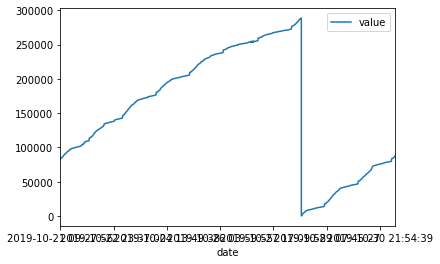

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt

#pf = pf.sort_values('date', ascending=True)
#plt.plot(pf['date'], pf['value'])
#plt.xticks(rotation='vertical')
#pf

pf.plot(x='date', y='value')

In [80]:
print(metricid[0][0])
len(metricid)

for row in products:
    print(row[0])

for id in metricid:
    pf=df.filter(df["value"]>'0').filter(df["hashvalue"]==id[0]).select('date','value').limit(200000).toPandas()
    pf.describe()
    

2012513398
Management
SIL
BIS


AttributeError: 'numpy.int64' object has no attribute '_get_object_id'

In [35]:
services.count()
products.show()

for row in services.rdd.collect():
    print(row.service)
    
 
#np.array(services.select("service").collect())
services

AttributeError: 'numpy.ndarray' object has no attribute 'count'

In [18]:
hashes = [] 
for _row in row:
    print(_row['hashvalue'])
    hashes.append(_row['hashvalue'])

#col

In [11]:
#names.select("*").collect()
#hashes
meta_p

,product,service,__name__,alertname,alertstate,instance,job,severity,code,le,...,state,logical_system,prio,port,drive,account,instanceid,queuename,schemaid,metricid
0,BIS,CommunicationService,bis_order_execution_time_seconds_bucket,None,None,clspromsg-edi02:13000,CBR,None,None,0.1,...,None,None,None,None,None,None,None,None,1452081544,767489412
1,BIS,CommunicationService,bis_hardware_disk_total,None,None,clspromsg-edi01:13000,CBR,None,None,None,...,None,None,None,None,A:\,None,None,None,245699359,812119617
2,BIS,CommunicationService,bis_ds_server_segment_post_failed_total,None,None,clspromsg-edi02:13000,CBR,None,None,None,...,None,None,None,None,None,None,None,None,-841000466,-1483665529
3,BIS,CommunicationService,bis_jms_queue_times_seconds,None,None,clspromsg-edi02:13000,CBR,None,None,None,...,None,None,None,None,None,None,None,None,-324358720,876593825
4,BIS,CommunicationService,ALERTS,InstanceDown,pending,clspromsg-edi01:13000,CBR,critical,None,None,...,None,None,None,None,None,None,None,None,1587849204,1797174388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26681,Management,None,prometheus_sd_file_scan_duration_seconds,None,None,localhost:9090,prometheus,None,None,None,...,None,None,None,None,None,None,None,None,2064622044,-912028677
26682,Management,None,go_memstats_gc_cpu_fraction,None,None,localhost:9090,prometheus,None,None,None,...,None,None,None,None,None,None,None,None,211963094,-509435055
26683,Management,None,go_memstats_heap_sys_bytes,None,None,localhost:9090,prometheus,None,None,None,...,None,None,None,None,None,None,None,None,211963094,1549694827
26684,Management,None,net_conntrack_dialer_conn_failed_total,None,None,localhost:9090,prometheus,None,None,None,...,None,None,None,None,None,None,None,None,-149365475,2089050626
